## Slab Waveguide

<img src="./Images/slab_waveguide.png" width="500"/>

### TE-polarized optical modes in slab waveguide
Suppose $E_x, E_z = 0$ and $E_y$ invariant in y-direction, i.e. $\partial_y E_y = 0$. The optical wave propagates in z-direction with propagation constant $\beta = k n_\text{eff}$.
$$ \bold{E} = E_y(x,z)\bold{u}_y = E_y(x)\text{exp}(i\beta z)\bold{u}_y $$

Wave equation $\Delta E_y + k^2 n^2 E_y = 0$ ($n$ could be $n_1$, $n_2$, $n_3$) results in:
$$ \frac{d^2 E_y}{dx^2} + \left[ k^2 n^2 - \beta^2\right] E_y = 0 $$

Solving the above equation in respective homogeneous media:
$$ \begin{align}
E_y & = A\text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = A\text{cos}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = A\text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

where $A$ is an undetermined constant and $h_1$, $\gamma_2$, $\gamma_3$ is inverse of length:
$$ \begin{align}
h_1 & = \sqrt{k^2n_1^2 - \beta^2} = k\sqrt{n_1^2 - n_\text{eff}^2} \\
\gamma_2 & = \sqrt{\beta^2-k^2n_2^2} = k\sqrt{n_\text{eff}^2 - n_2^2} \\
\gamma_3 & = \sqrt{\beta^2-k^2n_3^2} = k\sqrt{n_\text{eff}^2 - n_3^2}
\end{align} $$

- Boundary condition 1: $E_y$ is continuous at $x=a$ and $x=-a$. Yes!
- Boundary condition 2: $H_z \propto  d E_y / dx$ is continuous at $x=a$ and $x=-a$

$$ \begin{align}
\frac{d E_y}{dx} & = -\gamma_3 A\text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = -h_1 A\text{sin}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = \gamma_2 A\text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

We have:
$$ \gamma_3 \text{cos}(h_1 a - \phi) = h_1 \text{sin}(h_1 a - \phi) $$
$$ \gamma_2 \text{cos}(h_1 a + \phi) = h_1 \text{sin}(h_1 a + \phi) $$

That is:
$$ \text{tan}(h_1 a - \phi) = \frac{\gamma_3}{h_1} $$
$$ \text{tan}(h_1 a + \phi) = \frac{\gamma_2}{h_1} $$

Eliminating $\phi$ yields:
$$ h_1 a = \frac{m\pi}{2} + \frac{1}{2}\text{tan}^{-1}\left(\frac{\gamma_2}{h_1}\right) + \frac{1}{2}\text{tan}^{-1}\left(\frac{\gamma_3}{h_1}\right) $$
$$ m=0,1,2,... $$

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

plt.style.use(r"C:\Users\B30724\Documents\Python\presentation.mplstyle")

In [6]:
def eqn_te(neff, m, n1, n2, n3, a, wavelength):
    k = 2*np.pi/wavelength
    h1 = k*np.sqrt(n1**2 - neff**2)
    g2 = k*np.sqrt(neff**2 - n2**2)
    g3 = k*np.sqrt(neff**2 - n3**2)
    return m*np.pi/2 + np.arctan(g2/h1)/2 + np.arctan(g3/h1)/2 - h1*a

In [7]:
a = 0.11e-6  # Half of the slab thickness
wavelength = 1.31e-6  # Vacuum wavelength
n1 = 3.5068525745481187  # 1310 nm
n2 = 1.4467245597197314  # 1310 nm
n3 = 1.4467245597197314  # 1310 nm
# wavelength = 1.55e-6  # Vacuum wavelength
# n1 = 3.4763795526495227  # 1550 nm
# n2 = 1.4440023011779028  # 1550 nm
# n3 = 1.4440023011779028  # 1550 nm
m = 0  # Mode number: 0 for the fundamental mode

func_te = lambda neff: eqn_te(neff, m, n1, n2, n3, a, wavelength)
initial_guess = (n1 + max(n2,n3))/2
root = fsolve(func_te, initial_guess)
print("Root found:", root[0])

Root found: 2.99465530798697


Once we have solved for the effective index, we get the propagation constant $\beta$. We can then calculate $h_1$, $\gamma_2$, $\gamma_3$ and:
$$ \phi = \frac{1}{2}\text{tan}^{-1}\left(\frac{\gamma_2}{h_1}\right) - \frac{1}{2}\text{tan}^{-1}\left(\frac{\gamma_3}{h_1}\right) $$
Finally, we can explicitly express the field (ignoring constant):

$$ \begin{align}
E_y & = \text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = \text{cos}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = \text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a 
\end{align} $$ 

In [8]:
neff = root[0]
x1 = np.linspace(-a, a, 111)  # Waveguide
x2 = np.linspace(-5*a, -a, 221)[:-1:]  # Substrate
x3 = np.linspace(a, 5*a, 221)[1::]  # Top cladding
x = np.hstack([x2, x1, x3])

k = 2*np.pi/wavelength
h1 = k*np.sqrt(n1**2 - neff**2)
g2 = k*np.sqrt(neff**2 - n2**2)
g3 = k*np.sqrt(neff**2 - n3**2)
phi = np.arctan(g2/h1)/2 - np.arctan(g3/h1)/2  # zero for symmetric waveguide (n2 = n3)
print(f"Penetration length (into upper cladding): {1/g3*1e9:.0f} nm")
print(f"Penetration length (into lower substrate): {1/g2*1e9:.0f} nm")

E3 = np.cos(h1*a-phi)*np.exp(-g3*(x3-a))
E1 = np.cos(h1*x1-phi)
E2 = np.cos(h1*a+phi)*np.exp(g2*(x2+a))
Ey = np.hstack([E2, E1, E3])

Penetration length (into upper cladding): 80 nm
Penetration length (into lower substrate): 80 nm


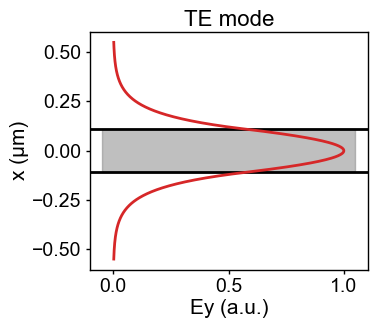

In [20]:
slab = a*1e6

fig, ax = plt.subplots(figsize=(4,3.5))
ax.axhline(slab, c='k')
ax.axhline(-slab, c='k')
ax.plot(Ey, x*1e6, c='tab:red')
ax.fill_between(ax.get_xlim(), slab, -slab, color='gray', alpha=0.5)
ax.set(xlabel="Ey (a.u.)", ylabel="x (µm)", title="TE mode")
fig.tight_layout()

### TM-polarized optical modes in slab waveguide
Suppose $H_x, H_z = 0$ and $H_y$ invariant in y-direction, i.e. $\partial_y H_y = 0$. The optical wave propagates in z-direction with propagation constant $\beta = k n_\text{eff}$.
$$ \bold{H} = H_y(x,z)\bold{u}_y = H_y(x)\text{exp}(i\beta z)\bold{u}_y $$

Wave equation $\Delta H_y + k^2 n^2 H_y = 0$ ($n$ could be $n_1$, $n_2$, $n_3$) results in:
$$ \frac{d^2 H_y}{dx^2} + \left[ k^2 n^2 - \beta^2\right] H_y = 0 $$

The general solutions written in respective regions have the same functional forms as in TE mode equations. However, the boundary condition is slightly different!
- Boundary condition 1: $H_y$ is continuous at $x=a$ and $x=-a$. Yes!
- Boundary condition 2: $E_z \propto  1/\varepsilon\:d H_y / dx$ is continuous at $x=a$ and $x=-a$

$$ \begin{align}
\frac{d H_y}{dx} & = -\gamma_3 \text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = -h_1 \text{sin}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = \gamma_2 \text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

We have:
$$ \frac{\gamma_3}{\varepsilon_3} \text{cos}(h_1 a - \phi) = \frac{h_1}{\varepsilon_1} \text{sin}(h_1 a - \phi) $$
$$ \frac{\gamma_2}{\varepsilon_2} \text{cos}(h_1 a + \phi) = \frac{h_1}{\varepsilon_1} \text{sin}(h_1 a + \phi) $$

That is:
$$ \text{tan}(h_1 a - \phi) = \frac{\varepsilon_1}{\varepsilon_3} \frac{\gamma_3}{h_1} $$
$$ \text{tan}(h_1 a + \phi) = \frac{\varepsilon_1}{\varepsilon_2} \frac{\gamma_2}{h_1} $$

Eliminating $\phi$ yields:
$$ h_1 a = \frac{m\pi}{2} + \frac{1}{2}\text{tan}^{-1}\left(\frac{\varepsilon_1}{\varepsilon_2} \frac{\gamma_2}{h_1}\right) + \frac{1}{2}\text{tan}^{-1}\left(\frac{\varepsilon_1}{\varepsilon_3} \frac{\gamma_3}{h_1}\right) $$
$$ m=0,1,2,... $$

In [10]:
def eqn_tm(neff, m, n1, n2, n3, a, wavelength):
    k = 2*np.pi/wavelength
    h1 = k*np.sqrt(n1**2 - neff**2)
    g2 = k*np.sqrt(neff**2 - n2**2)
    g3 = k*np.sqrt(neff**2 - n3**2)
    return m*np.pi/2 + np.arctan(n1**2/n2**2*g2/h1)/2 + np.arctan(n1**2/n3**2*g3/h1)/2 - h1*a

In [12]:
a = 0.11e-6  # Half of the slab thickness
wavelength = 1.31e-6  # Vacuum wavelength
n1 = 3.5068525745481187  # 1310 nm
n2 = 1.4467245597197314  # 1310 nm
n3 = 1.4467245597197314  # 1310 nm
# wavelength = 1.55e-6  # Vacuum wavelength
# n1 = 3.4763795526495227  # 1550 nm
# n2 = 1.4440023011779028  # 1550 nm
# n3 = 1.4440023011779028  # 1550 nm
m = 0  # Mode number: 0 for the fundamental mode

func_tm = lambda neff: eqn_tm(neff, m, n1, n2, n3, a, wavelength)
initial_guess = (n1 + max(n2,n3))/2
root = fsolve(func_tm, initial_guess)
print("Root found:", root[0])

Root found: 2.4023700054651447


Finally, we can explicitly express the field:

$$ \begin{align}
E_x & \propto \frac{i\beta}{\varepsilon} H_y \\
& = \frac{i\beta}{\varepsilon_3} \text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = \frac{i\beta}{\varepsilon_1} \text{cos}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = \frac{i\beta}{\varepsilon_2} \text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a 
\end{align} $$

$$ \begin{align}
E_z & \propto \frac{1}{\varepsilon} \frac{d H_y}{dx} \\
& = -\frac{\gamma_3}{\varepsilon_3} \text{cos}(h_1 a - \phi)\text{exp}[-\gamma_3(x-a)] \quad && \text{if}\ x > a \\
& = -\frac{h_1}{\varepsilon_1} \text{sin}(h_1 x - \phi) \quad && \text{if}\ -a < x < a \\
& = \frac{\gamma_2}{\varepsilon_2} \text{cos}(h_1 a + \phi)\text{exp}[\gamma_2(x+a)] \quad && \text{if}\ x < -a 
\end{align} $$

In [13]:
neff = root[0]
x1 = np.linspace(-a, a, 111)  # Waveguide
x2 = np.linspace(-5*a, -a, 221)[:-1:]  # Substrate
x3 = np.linspace(a, 5*a, 221)[1::]  # Top cladding
x = np.hstack([x2, x1, x3])

k = 2*np.pi/wavelength
h1 = k*np.sqrt(n1**2 - neff**2)
g2 = k*np.sqrt(neff**2 - n2**2)
g3 = k*np.sqrt(neff**2 - n3**2)
phi = np.arctan(n1**2/n2**2*g2/h1)/2 - np.arctan(n1**2/n3**2*g3/h1)/2  # zero for symmetric waveguide (n2 = n3)
print(f"Penetration length (into upper cladding): {1/g3*1e9:.0f} nm")
print(f"Penetration length (into lower substrate): {1/g2*1e9:.0f} nm")

E3 = (1/n3**2)*np.cos(h1*a-phi)*np.exp(-g3*(x3-a))
E1 = (1/n1**2)*np.cos(h1*x1-phi)
E2 = (1/n2**2)*np.cos(h1*a+phi)*np.exp(g2*(x2+a))
Ex = np.hstack([E2, E1, E3])

Penetration length (into upper cladding): 109 nm
Penetration length (into lower substrate): 109 nm


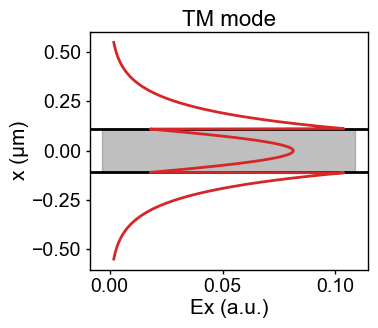

In [21]:
slab = a*1e6

fig, ax = plt.subplots(figsize=(4,3.5))
ax.axhline(slab, c='k')
ax.axhline(-slab, c='k')
ax.plot(Ex, x*1e6, c='tab:red')
ax.fill_between(ax.get_xlim(), slab, -slab, color='gray', alpha=0.5)
ax.set(xlabel="Ex (a.u.)", ylabel="x (µm)", title="TM mode")
fig.tight_layout()